This notebook collects some Python fitting and uncertainty analysis tools together in one place. It demonstrates them for a simple linear model. The ability to copy-paste these commands and make them work on your project does not abrogate your responsibility to understand the underlying concepts.

In [2]:
# imports and environment: this cell must be executed before any other in the notebook
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pressure_model as pm

Define some Python data variables, `xo` and `yo`

In [2]:
xo = [0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545, 0.54545455,
 0.63636364, 0.72727273, 0.81818182, 0.90909091] 
yo = [2.95654047, 3.60199822, 3.53138144, 3.87014833, 4.33444942, 4.25924911,
 4.69969418, 4.7268844,  5.10396512, 4.48760454]

Define a model `f` to try fit to those data.

In [3]:
# We will use the model 
def pressure_ode()
pressure_data = np.genfromtxt('data_sources/cs_p.txt',dtype=float,delimiter=', ',skip_header=1).T
p,_ = curve_fit(, pressure_data[0,:], pressure_data[1,:])

Calibrate the model quickly. Use `curve_fit` to obtain best-fit parameters

In [4]:
p,_ = curve_fit(f, xo, yo)
print('m={:2.1f}, c={:2.1f}'.format(*p))

m=2.2, c=3.1


Plot the best-fit model through the data.

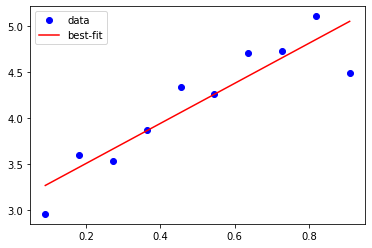

In [5]:
fig,ax = plt.subplots(1,1)
ax.plot(xo,yo,'bo',label='data')
x = np.linspace(np.min(xo), np.max(xo), 101)
ax.plot(x, f(x, *p), 'r-', label='best-fit')
ax.legend()

Use the covariance matrix that is output by `curve_fit` to parameterise "best-fitting" multi-variate normal distribution corresponding to the posterior (see Posterior Lab, Task 4).

This is a quick and efficient way to do uncertainty analysis on well-behaved models and data.

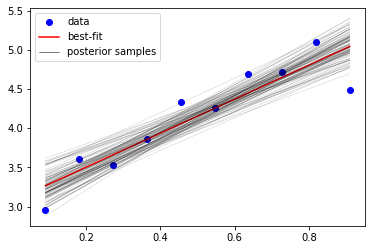

In [6]:
sigma = [0.25]*len(yo)  # uncertainty on observations
p,cov = curve_fit(f, xo, yo, sigma=sigma)   # second output is covariance matrix

fig,ax = plt.subplots(1,1)
ax.plot(xo,yo,'bo',label='data')
ax.plot(x, f(x, *p), 'r-', label='best-fit')
ps = np.random.multivariate_normal(p, cov, 100)   # samples from posterior
for pi in ps:
    ax.plot(x, f(x, *pi), 'k-', alpha=0.2, lw=0.5)
ax.plot([], [], 'k-', lw=0.5, label='posterior samples')
ax.legend()


But how to choose the uncertainty $sigma$ if it hasn't been given for your data? 
1. Ad-hoc calibration. Experiment with different values until you get a good fit of curves through the data.
2. Optimisation. For example, [Bayesian Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge) (you do not need to know how to do this, but it is neat rabbit hole to go down)

In [7]:
# run the commands below only if you hit an error:
# ValueError: numpy.ufunc size changed, may indicate binary 
# incompatibility. Expected 216 from C header, got 192 from PyObject

# import sys
# !conda install --yes --prefix {sys.prefix} numpy=1.16.0

# then restart the notebook kernel

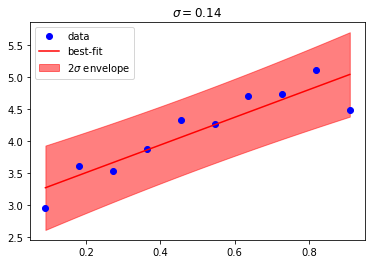

In [8]:
from sklearn.linear_model import BayesianRidge

n_order = 1
yv,xv = np.array(yo), np.array(xo)
Xv = np.vander(xv, n_order + 1, increasing=True)

br = BayesianRidge(fit_intercept=False, tol=1e-5)
br.fit(Xv,yv)

X = np.vander(x, n_order + 1, increasing=True)
y,y_var = br.predict(X, return_std = True)

sigma = [0.25]*len(yo)  # uncertainty on observations
p,cov = curve_fit(f, xo, yo, sigma=sigma)   # second output is covariance matrix

fig,ax = plt.subplots(1,1)
ax.set_title('$\sigma={:3.2f}$'.format(br.lambda_))
ax.plot(xo,yo,'bo',label='data')
ax.plot(x, y, 'r-', label='best-fit')
ax.fill_between(x, y-2*y_var, y+2*y_var, color = 'r', alpha=0.5, label='2$\sigma$ envelope')
ax.legend()